#Selección de Muestra (Planteamiento de Heckit)
##Strauss & Thomas, "Health, Wealth and Wages of Men and Women in Urban Brazil" (1995)

$$Y = X\beta + \epsilon$$
$\beta_{ols} \rightarrow \beta \Longleftrightarrow \mathbb{E}[\epsilon'X] = 0 \Longrightarrow \mathbb{E}[\epsilon | X] = 0$. Pero si $\mathbb{E}[\epsilon | X] \neq 0$, tenemos un problema. Esta situación nos regresa el problema de selección de muestra. (Hay otras causas que también la generan). 

$$Y = X\beta + \epsilon$$
$$\mathbb{E}[Y | X] = \mathbb{E}[X\beta | X] + \mathbb{E}[\epsilon | X] = X\beta$$

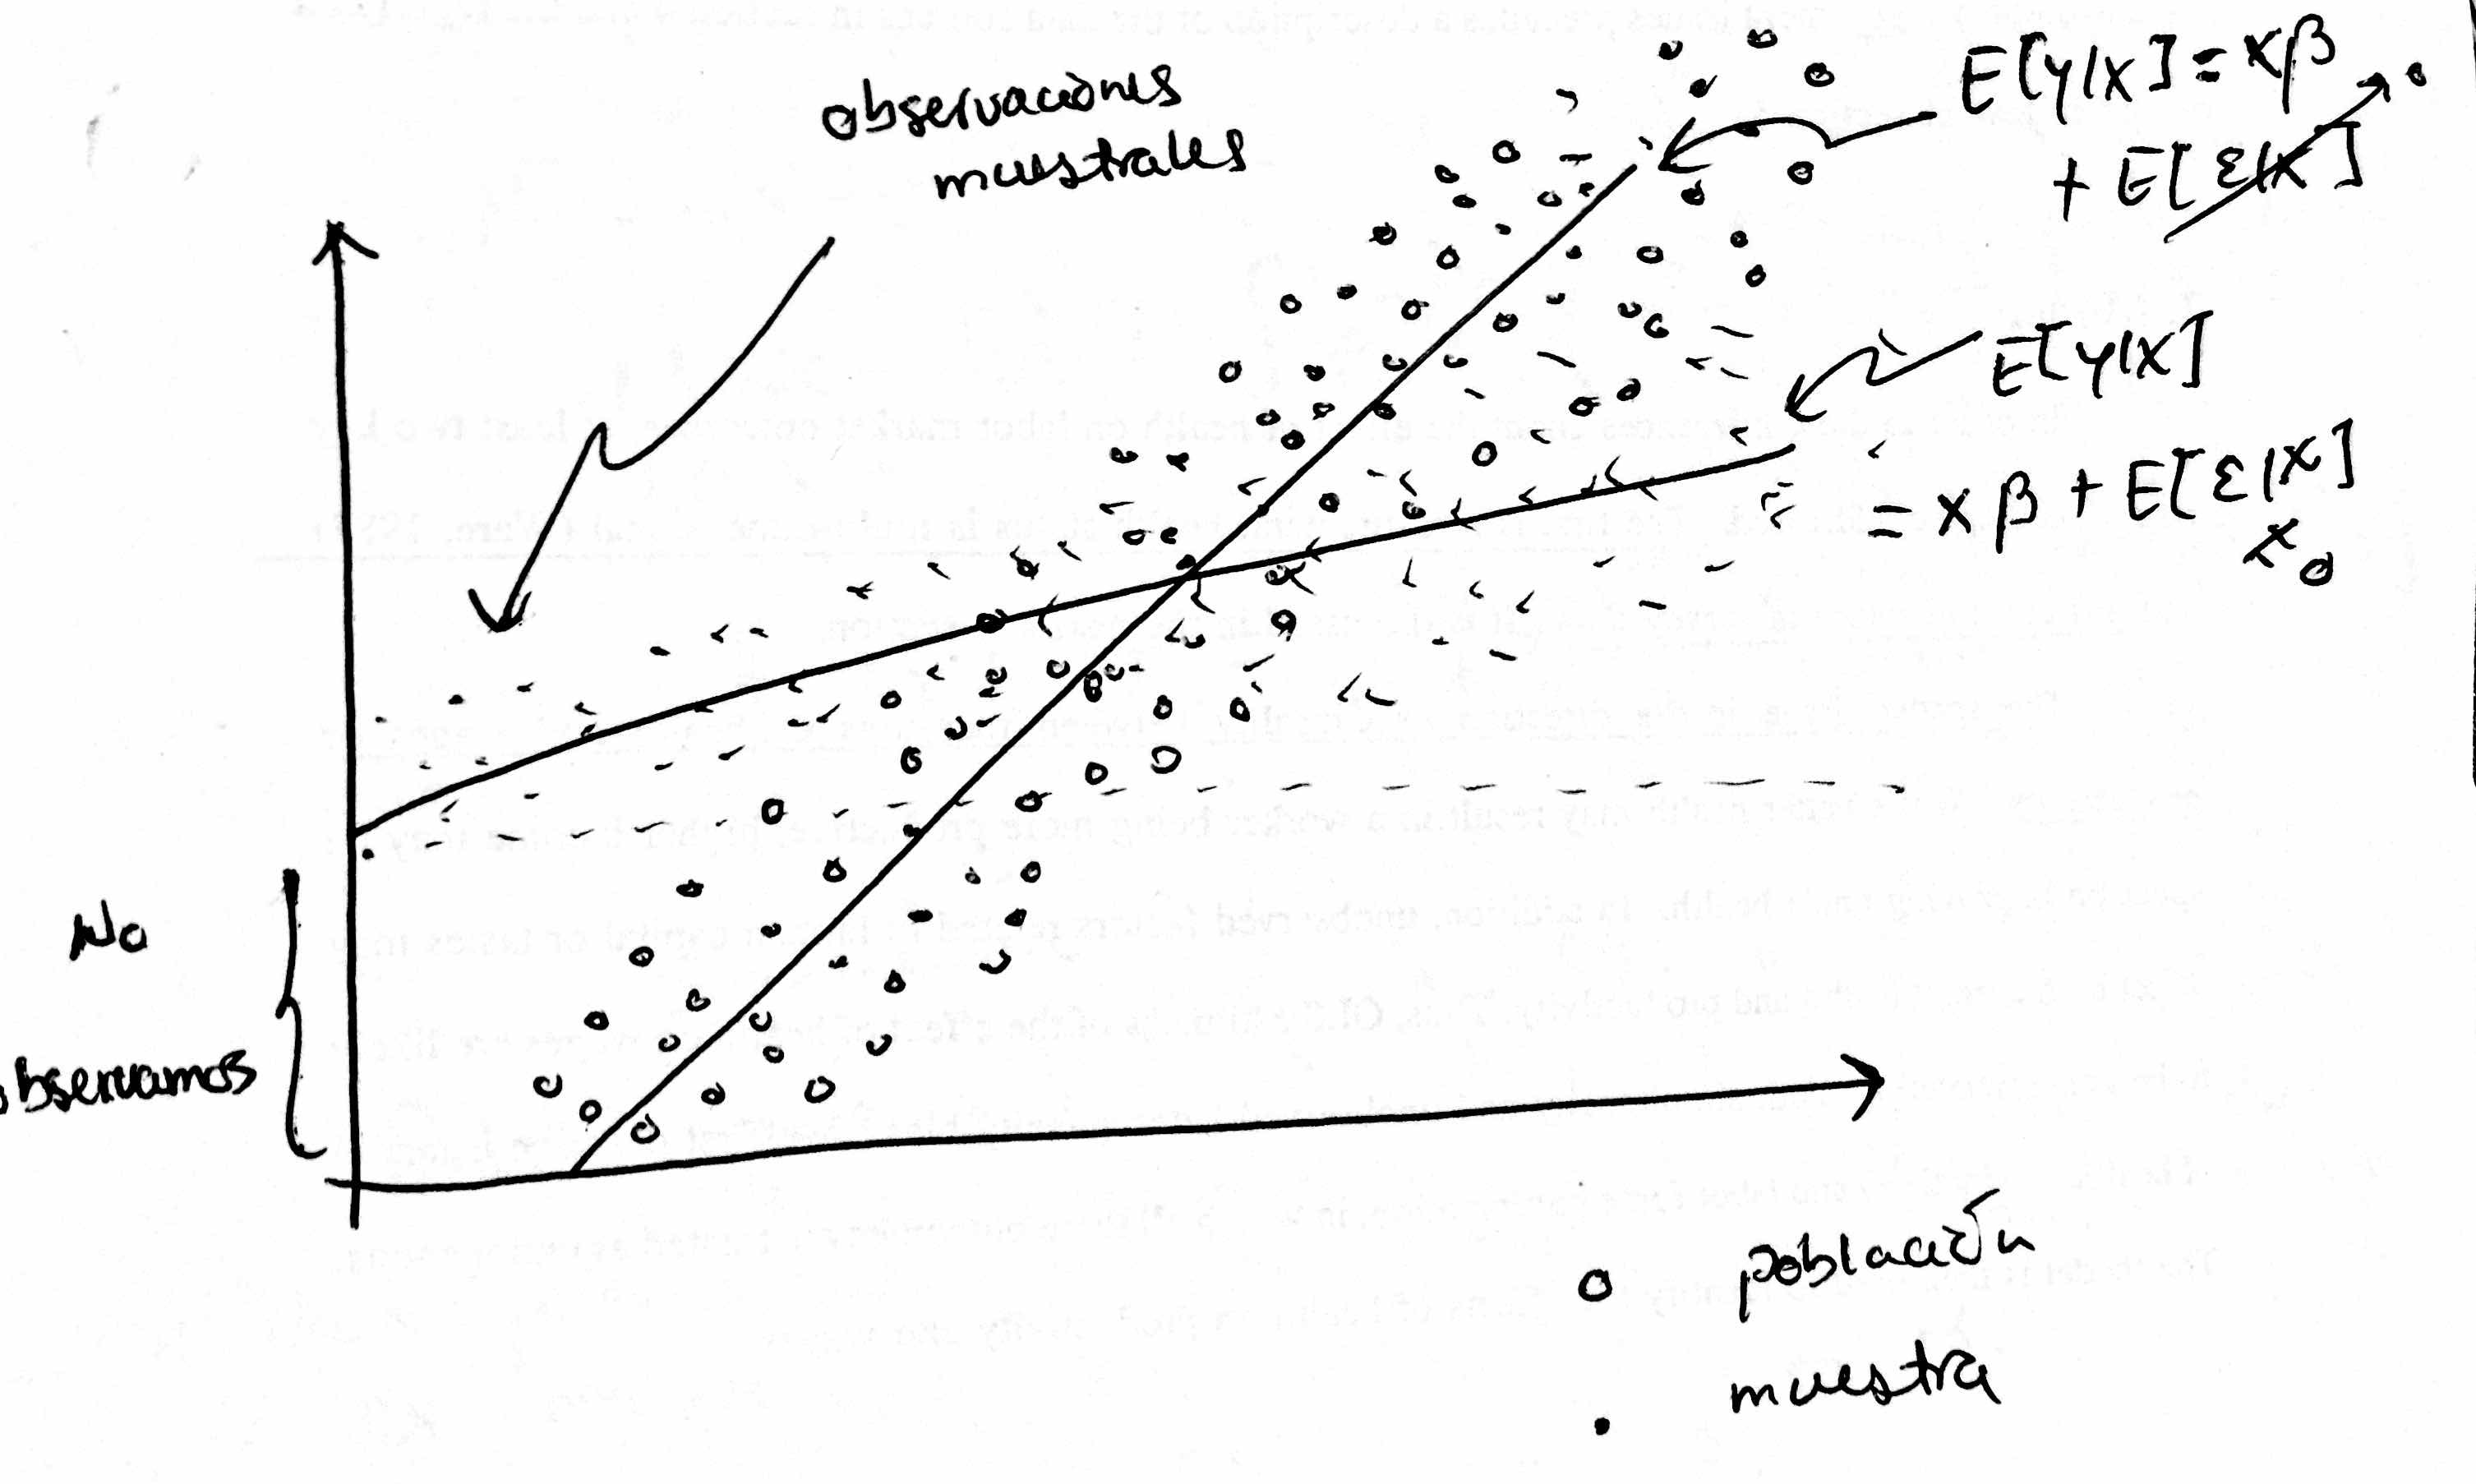

In [11]:
from IPython.display import Image
Image(filename='pic1clase9.jpeg')

Si tuviéramos menos observaciones que la población, pero tuviéramos obesrvaciones en la parte que no se autoseleccionó, podríamos realizar la estimación. En el caso de la gráfica, el sesgo por selección de muestra subestima la estimación. Es decir, es un sesgo negativo. En esa estimación, $\mathbb{E}[\epsilon | x] \neq 0$. Tobit corrige lo anterior mediante la probabilidad de estar en esta selección de muestra o no con una variable latente. El problema de Tobit es que utiliza las mismas x's y las mismas betas para modelar la relación de $y$ con $x$. Heckman permite que la probabilidad de selección se modele con diferentes x's mediante la dependencia de un modelo estructural. (Reservation wage & market wage). 

##Heckit (1974, 1979): Heckman correction bias (Heckman en dos etapas)

[Ecuación objetivo a estimar]$$w = X_1\beta_1 + \epsilon_1, \quad \mathbb{E}[\epsilon_1] = \mathbb{E}[\epsilon_2] = 0$$

[Proceso de selección de muestra]$$h = X_2\beta_2 + \epsilon_2, \quad \mathbb{E}[\epsilon_1\epsilon_2] = \sigma_{12} $$, 

donde $h \equiv$ horas trabajadas. Con $h$ estimamos la probabilidad de entrar al proceso de selección. 
Si tuviéramos una muestra representativa:

$$\mathbb{E}[w | X_1] = X_1\beta + \mathbb{E}[\epsilon_1 | X_1]$$
$$\mathbb{E}[w | X_1, h >0] = X_1\beta + \mathbb{E}[\epsilon_1 | X_1, h>0]$$

Propuesta: si estimamos $\mathbb{E}[\epsilon_1 | X_1, h>0]$, podemos incluirlo en la regresión y, por tanto, corregir por el sesgo. 

Supongamos que $(\epsilon_1, \epsilon_2) \sim  N[0, \Sigma],$ donde 

$$\Sigma = \begin{bmatrix}
\sigma_1^2  & \sigma_{12}  \\[0.3em]
\sigma_{12}  & \sigma_{2}^2 
\end{bmatrix}$$

$$\mathbb{E}[\epsilon_1 | h>0] = \mathbb{E}[\epsilon_1 | \epsilon_2 > - X_2\beta_2] = \frac{\sigma_{12}}{\sigma_{22}^{\frac{1}{2}}} \lambda, $$
 
donde se puede mostrar que 

$$\lambda \equiv \frac{F\Bigg[-\frac{X_2\beta_2}{\sqrt{\sigma_{22}}}\Bigg]}{1-F\Bigg[\frac{X_2\beta}{\sqrt{\sigma_{22}}}\Bigg]}, $$ el coeficiente de Mills.

Heckmann prueba que si conocemos el proceso de selección de muestra y los errores, entonces podemo utilizar el resultado de Mills, entonces podemos estimar $\lambda$. Así, 

$$\mathbb{E}[w | X_1, h>0] = X_1\beta + \mathbb{E}[\epsilon_1 | X_1, h>0] = X_1\beta_1 + \frac{\sigma_{12}}{\sigma_{22}^{1/2}}\lambda$$

$$w_i = X_i\beta + \frac{\sigma_{12}}{\sigma_{22}^{1/2}}\lambda_i + v_i, $$
donde $\mathbb{E}[v_i | X] = 0$

Para corregir por el sesgo de selección de muestra, correremos la siguiente regresión:

[*]$$w_i = X_i\beta + \theta \hat{\lambda_i} + v_i, $$
donde $\theta = \frac{\sigma_{12}}{\sigma_{22}^{1/2}}$.



Mejora el tema de Tobit porque el tema de selección de muestra es diferente a mi ecuación principal. En el proceso de selección de muestra podemos tener algunas de las variables explicativas del modelo principal, pero tenemos que tener al menos una variable $X_2$ distinta al modelo objetivo. Avanza de su propuesta de Shadow price dado que no introduce ninguna ecuación estructural entre la ecuación principal y la de selección de muestra. Para esto necesitamos una forma de modelar el proceso de selección y suponer que los errores se distrubuyen como una normal para poder aplicar el coeficiente inverso de Mills, el cual se distribuye como una normal.


Primera etapa: estimar $\hat{\lambda_i}$ (Probit). Estimamos la probabilidad de seleccionarse (en este caso, la probabilidad de trabajar). 

$$Prob (h = 1) = Prob(h^* > 0) = Prob(\epsilon_2 > - X_2\beta) = 1-F\Bigg[\frac{X_2\beta}{\sqrt{\sigma_{22}}}\Bigg]$$

Segunda etapa: Correr la regresión [*] principal incluyendo $\hat{\lambda_i}$.
    
El problema es que $\hat{\lambda}$ es heteroscedástico. Si lo hacemos por maxima verosimilitud, podemos hacerlo todo al mismo tiempo y no perder grados de libertad. 

#####Hasta aquí llega el examen parcial. Es decir, no vendrá el paper de Thomas & Strauss. El examen vale el 40% de la calificación final. El final es acumulativo.

#Paper de Thomas & strauss, "Health, Wealth and Wages of Men and Women in Urban Brazil" (1995)

La acumulación de capital humano es un proceso de inversión que nuestros padres hacen en nosotros. Lo anterior es igual o más importante que la educación formal. La salud también es importante como varible explicativa, ya que puede truncar nuestra productividad mediante nuestro ciclo de vida. Lo anterior también depende de las decisiones que uno toma desde niño hasta la vida adulta. Thomas & Strauss estiman una ecuación de salarios no tradicional, no sólo en términos de años de años de educación, sino también en términos de salud. 

Variables explicativas: BMI (Body Mass Index), Height (estatura), proteínas (Indicadores de salud). ¿Cuál es la relación causal entre la salud y el desarrollo personal del individuo? Los nutrientes también afectan la capacidad cognitiva. 
    * La estatura es una proxy del ambiente socioeconómico del niño cuando era niño. La estatura es una variable del largo plazo. Por lo anterior, la estatura es una variable predeterminada. Es decir, es una variable de capital humano que refleja los antecedentes familiares. 
    * El Body Mass Index refleja la relación metabólica entre capacidad física e ingesta. Es una variable de mediano plazo. 
    * Ingesta: Calorías, proteínas.

$$w = X\beta + Salud\theta + \epsilon$$

Tenemos endogeneidad en: BMI, calorías, proteínas debido a que el ingreso las puede causar, mientras que al mismo tiempo estas pueden causar el ingreso. Es decir, tenemos un problema de doble causalidad. 

Para resolver lo anterior se utilizan variables instrumentales:
    
$$Z_{IV} = [Ingreso_{nolaboral} \quad precios_{comida_{localidad}}] \quad \mathbb{E}[\epsilon | Z] = 0 \quad Z'Salud \neq 0$$
    
    

Aún cuando tenemos precios a nivel localidad, no vamos a lograr que la Salud no sea ortogonal con Z. Por lo anterior, necesitamos usar el Ingreso no laboral y varios precios de comida por localidad. Queremos hallar el efecto de la salud en la productividad. Además de resolver por el problema de endogeneidad, también tenemos que resolver el problema de selección de muestra. 

Dos temas:

    * Correlación de la salud con el error por endogeneidad;
    * Correlación de la salud con el error por selección de muestra;
    
En la muestra tienes autoempleados, asalariados y gente que no trabaja. Esto es un poco diferente respecto del Heckit, ya que el proceso de selección es diferente. Los autores abordan el proceso de selección de muestra de la siguiente manera:

    *Mujeres:
        - autoempleado (lambda_1^M);
        - asalariado (lambda_2^M);
        - no trabaja (lambda_3^M)
    *Hombres:
        - autoempleado (lambda_1^H) ;
        - asalariado (lambda_2^H)
       

La prueba de sobreidentificación de Bassman. El Hassard rate es la lambda para la parte de selección de muestra. La primera columna de la tabla dos es una wage equation cualquiera (controla por la eduación), mientras que la segunda controla por la estatura. En términos de significancia, la estatura no añade mucho poder explicativo al modelo. El hazard rate es significativo, por lo que hay un problema de selección de muestra. Aquellos que deciden entrar a trabajar, las características que los hicieron trabjar los hacen tener más productividad laboral. Un aumento de un punto porcentual en la estatura está correlacionado con un incremento de dos punto cuatro porciento del salario en el individuo. La estatura es una variable de capital humano diferente a la de escolaridad. Esto sucede, dado que no disminuye la educación. En el paper de lam & Schoening sí sucede esto con la habilidad: parte del efecto de la escolaridad se va a la habilidad. En la segunda columna el hazard rate se hace menos significativo (al añadir la talla (height)), entonces las características no observables que capturaba parte del proceso de selección de muestra dejan de ser relevantes, por lo que la estatura también refleja la decisión del individuo de entrar o no entrar al mercado laboral. En la columna tres agregamos el Body Mass Index. No solamente hombres altos tienen mayores altos, sino también altos y robustos. La última columna de la tabla quiere ver, controlando por años de escolaridad, estatura, proteína y calorías, cómo afecta esto en la productividad laboral. ¿Qué podemos ver? El término cuadrático de proteína es positivo, por lo que se comporta de manera convexa. Para pocas proteínas tendremos una alta productividad laboral, mientras que para para un nivel mediano de estas se llega al mínimo de productividad laboral. Para una ingesta con muchas proteínas se incrementa la productividad laboral. La sobre identificación nos dice que estas son buenas variables instrumentales, ya que son exógenas. En la primera tabla podemos observar que los instrumentos son válidos conjuntamente, aunque en ciertos casos no son validos individualmente.  

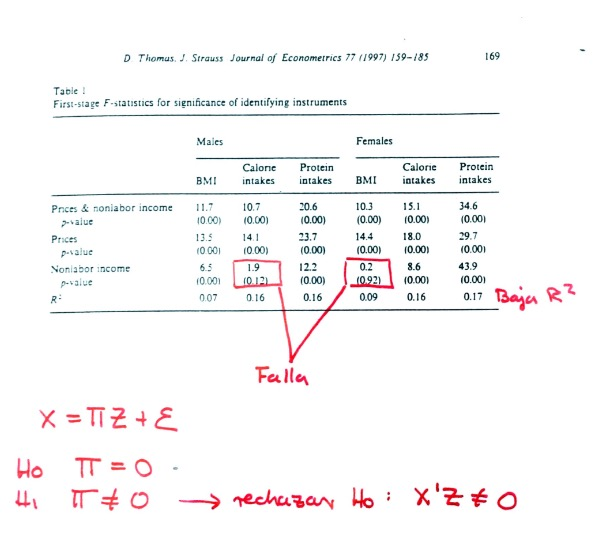

In [16]:
from IPython.display import Image
Image(filename='pic2clase9.jpg')

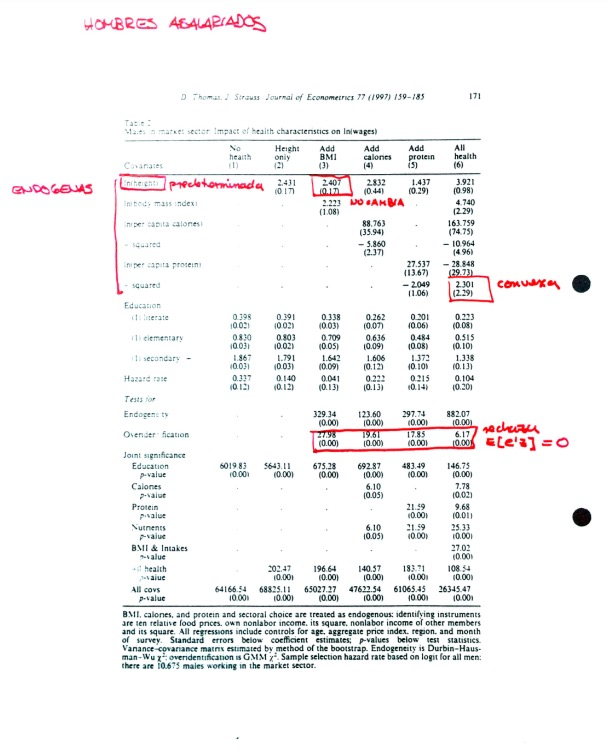

In [17]:
from IPython.display import Image
Image(filename='pic3clase9.jpg')

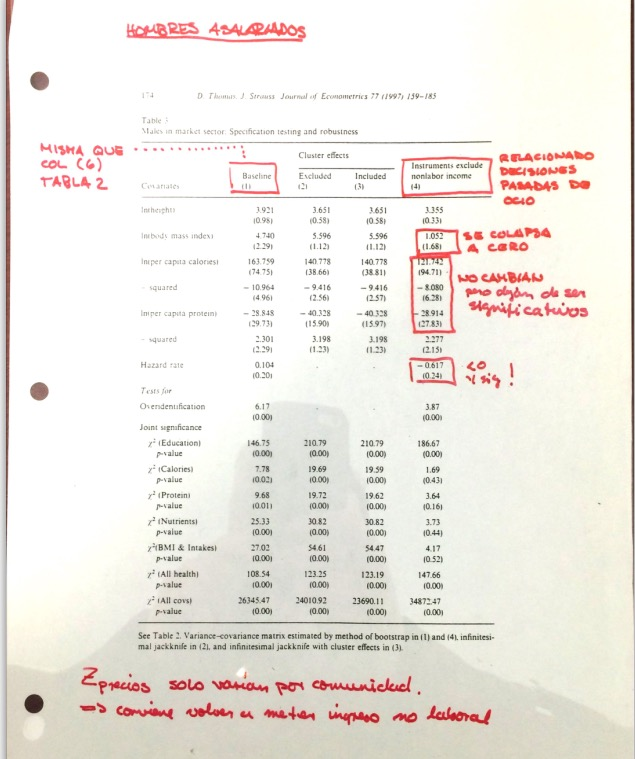

In [18]:
from IPython.display import Image
Image(filename='pic4clase9.jpg')